# Car Price Prediction
#### Predicting selling price of old cars using price dataset from Cardekho.com (Kaggle) 

In [1]:
import pandas as pd
import numpy as np

In [58]:
data = pd.read_csv('cardekho.csv')
# Selecting top 5000 data from table
data = data.iloc[:4000]

In [59]:
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,present_price,mileage,selling_price
0,BMW 5,BMW,5,0,2000,Dealer,Diesel,Automatic,7793500,22.48,4850000
1,BMW 5,BMW,5,0,2000,Dealer,Diesel,Automatic,7793500,22.48,4850000
2,Mahindra KUV,Mahindra,KUV,0,30000,Individual,Petrol,Manual,765000,18.15,400000
3,Maruti Ignis,Maruti,Ignis,0,5000,Individual,Petrol,Manual,707430,20.89,550000
4,Maruti S-Presso,Maruti,S-Presso,0,5000,Individual,Petrol,Manual,519500,21.70,500000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           4000 non-null   object 
 1   brand              4000 non-null   object 
 2   model              4000 non-null   object 
 3   vehicle_age        4000 non-null   int64  
 4   km_driven          4000 non-null   int64  
 5   seller_type        4000 non-null   object 
 6   fuel_type          4000 non-null   object 
 7   transmission_type  4000 non-null   object 
 8   present_price      4000 non-null   int64  
 9   mileage            4000 non-null   float64
 10  selling_price      4000 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 343.9+ KB


In [61]:
data.groupby(["seller_type"]).count()

,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,present_price,mileage,selling_price
seller_type,,,,,,,,,,
Dealer,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244
Individual,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756


In [62]:
print(data.groupby(["fuel_type"]).count())
print(data.groupby(["transmission_type"]).count())


           car_name  brand  model  vehicle_age  km_driven  seller_type  \
fuel_type                                                                
CNG              68     68     68           68         68           68   
Diesel         1565   1565   1565         1565       1565         1565   
Petrol         2367   2367   2367         2367       2367         2367   

           transmission_type  present_price  mileage  selling_price  
fuel_type                                                            
CNG                       68             68       68             68  
Diesel                  1565           1565     1565           1565  
Petrol                  2367           2367     2367           2367  
                   car_name  brand  model  vehicle_age  km_driven  \
transmission_type                                                   
Automatic              1036   1036   1036         1036       1036   
Manual                 2964   2964   2964         2964       2964   

  

In [63]:
# checking null values
data.isna().any()

car_name             False
brand                False
model                False
vehicle_age          False
km_driven            False
seller_type          False
fuel_type            False
transmission_type    False
present_price        False
mileage              False
selling_price        False
dtype: bool

#### No Null Values

In [64]:
data.describe()

,vehicle_age,km_driven,present_price,mileage,selling_price
count,4000.000000,4000.000000,4.000000e+03,4000.000000,4.000000e+03
mean,2.775250,29351.420750,2.798133e+06,20.283510,1.034047e+06
std,0.802433,24185.338723,2.407312e+07,3.845193,1.199302e+06
min,0.000000,100.000000,3.880000e+05,4.000000,2.000000e+05
25%,2.000000,14000.000000,7.510000e+05,17.600000,5.500000e+05
50%,3.000000,25000.000000,1.040250e+06,20.300000,7.500000e+05
75%,3.000000,40000.000000,1.461375e+06,23.000000,1.000000e+06
max,4.000000,590000.000000,4.892833e+08,33.540000,3.950000e+07


In [65]:
data.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'present_price', 'mileage',
       'selling_price'],
      dtype='object')

In [66]:
final_data = data[['vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'present_price', 'mileage',
       'selling_price']]

In [67]:
final_data.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,present_price,mileage,selling_price
0,0,2000,Dealer,Diesel,Automatic,7793500,22.48,4850000
1,0,2000,Dealer,Diesel,Automatic,7793500,22.48,4850000
2,0,30000,Individual,Petrol,Manual,765000,18.15,400000
3,0,5000,Individual,Petrol,Manual,707430,20.89,550000
4,0,5000,Individual,Petrol,Manual,519500,21.70,500000


In [68]:
# Convert all the non-numerical columns using one-hot encoding
final_data = pd.get_dummies(final_data)

In [69]:
final_data

,vehicle_age,km_driven,present_price,mileage,selling_price,seller_type_Dealer,seller_type_Individual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,2000,7793500,22.48,4850000,1,0,0,1,0,1,0
1,0,2000,7793500,22.48,4850000,1,0,0,1,0,1,0
2,0,30000,765000,18.15,400000,0,1,0,0,1,0,1
3,0,5000,707430,20.89,550000,0,1,0,0,1,0,1
4,0,5000,519500,21.70,500000,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4,18000,1112000,18.60,725000,1,0,0,0,1,0,1
3996,4,37015,1112000,18.60,695000,1,0,0,0,1,0,1
3997,4,16000,1057500,18.50,540000,1,0,0,0,1,0,1
3998,4,28056,1072000,18.60,576000,1,0,0,0,1,0,1


In [70]:
# Correlation
final_data.corr()

,vehicle_age,km_driven,present_price,mileage,selling_price,seller_type_Dealer,seller_type_Individual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
vehicle_age,1.000000,0.358217,-0.032403,0.007811,-0.053400,0.126415,-0.126415,-0.016190,0.060484,-0.055798,-0.005803,0.005803
km_driven,0.358217,1.000000,-0.025942,0.079537,-0.039566,-0.033551,0.033551,0.053037,0.299013,-0.310845,-0.097753,0.097753
present_price,-0.032403,-0.025942,1.000000,-0.103103,0.330127,0.053107,-0.053107,-0.011607,0.069369,-0.065826,0.122901,-0.122901
mileage,0.007811,0.079537,-0.103103,1.000000,-0.366197,-0.136891,0.136891,0.195605,0.184043,-0.234186,-0.243836,0.243836
selling_price,-0.053400,-0.039566,0.330127,-0.366197,1.000000,0.173131,-0.173131,-0.058312,0.281641,-0.264311,0.395757,-0.395757
seller_type_Dealer,0.126415,-0.033551,0.053107,-0.136891,0.173131,1.000000,-1.000000,0.038393,0.014487,-0.024482,0.224009,-0.224009
seller_type_Individual,-0.126415,0.033551,-0.053107,0.136891,-0.173131,-1.000000,1.000000,-0.038393,-0.014487,0.024482,-0.224009,0.224009
fuel_type_CNG,-0.016190,0.053037,-0.011607,0.195605,-0.058312,0.038393,-0.038393,1.000000,-0.105428,-0.158327,-0.077748,0.077748
fuel_type_Diesel,0.060484,0.299013,0.069369,0.184043,0.281641,0.014487,-0.014487,-0.105428,1.000000,-0.965192,0.012471,-0.012471
fuel_type_Petrol,-0.055798,-0.310845,-0.065826,-0.234186,-0.264311,-0.024482,0.024482,-0.158327,-0.965192,1.000000,0.008066,-0.008066


<AxesSubplot:>

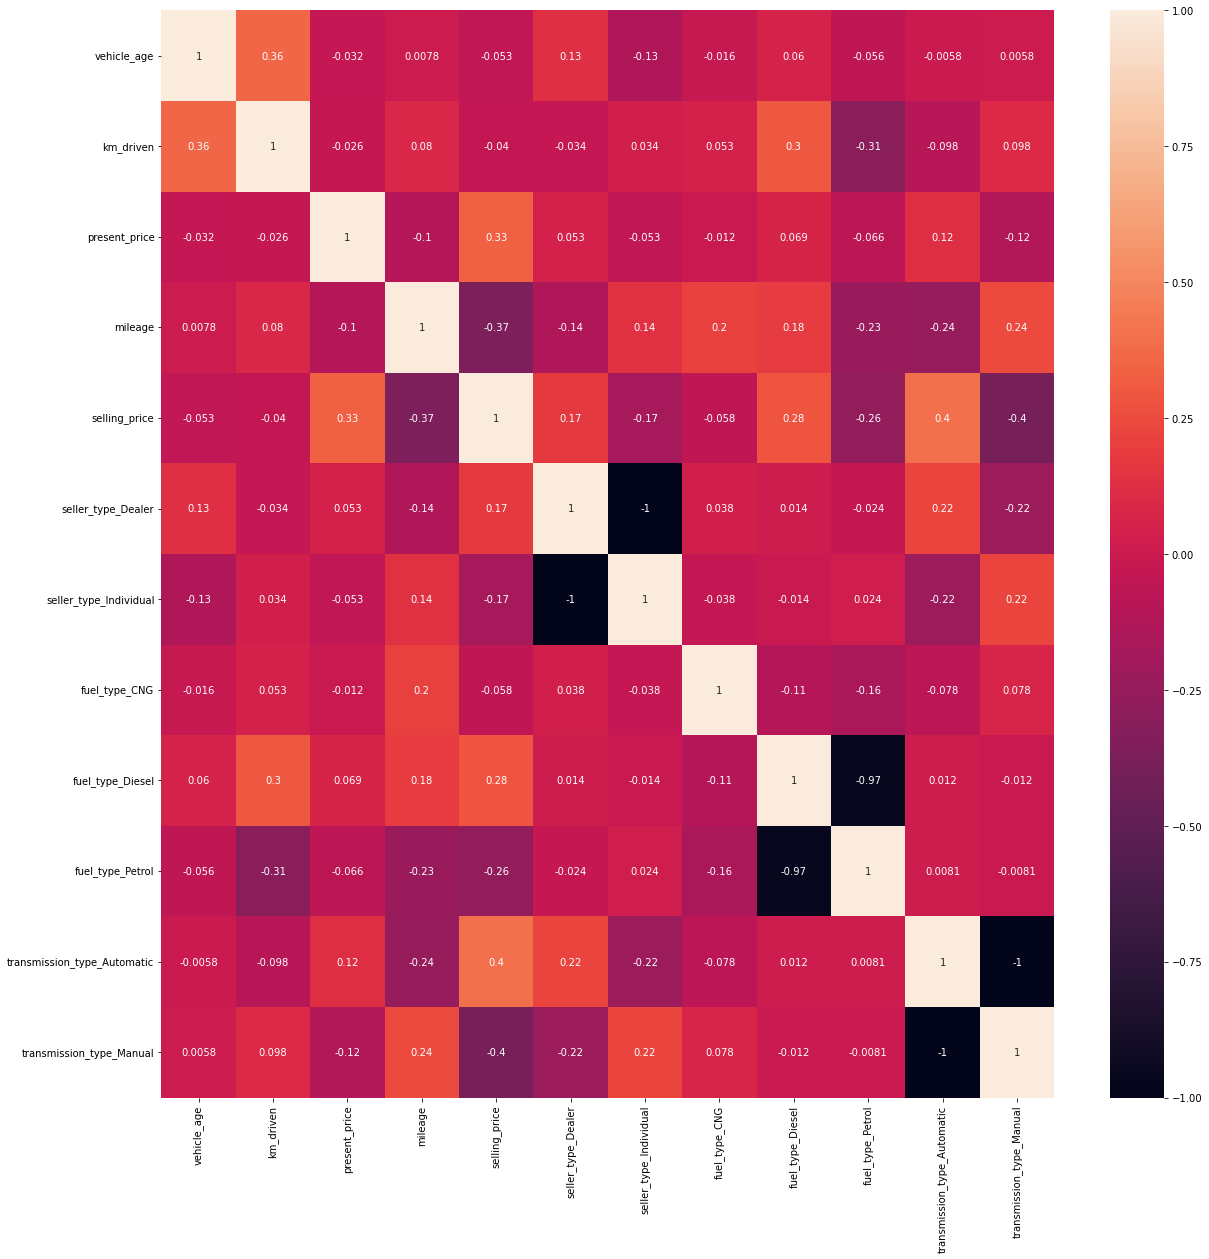

In [71]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
relation = final_data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(relation,annot=True)

In [72]:
final_data.columns

Index(['vehicle_age', 'km_driven', 'present_price', 'mileage', 'selling_price',
       'seller_type_Dealer', 'seller_type_Individual', 'fuel_type_CNG',
       'fuel_type_Diesel', 'fuel_type_Petrol', 'transmission_type_Automatic',
       'transmission_type_Manual'],
      dtype='object')

In [73]:
x = final_data[['vehicle_age', 'km_driven', 'present_price', 'mileage',
       'seller_type_Dealer', 'seller_type_Individual', 'fuel_type_CNG',
       'fuel_type_Diesel', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual']]
y = final_data['selling_price']

### Feature importance

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [75]:
print(model.feature_importances_)

[1.80948914e-02 3.35907559e-02 3.19221916e-01 3.56795413e-01
 1.59317778e-03 1.58907925e-03 2.98007464e-05 6.97713150e-02
 4.79388839e-02 7.11115987e-02 8.02631681e-02]


#### Present Price and  Mileage is highly important feature

### Splitting Dataset

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [77]:
y_test.dtypes

dtype('int64')

## Using Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()

### Hyperparameter tuning

In [81]:
#parameters
n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200]
max_features = ['auto','sqrt']
max_depth = [5,10,15,20,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf =[1,2,5,10]

In [82]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf': min_samples_leaf
}

In [83]:
rf_random = RandomizedSearchCV(estimator = random, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state = 42, n_jobs =1)

In [84]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [89]:
x_test

,vehicle_age,km_driven,present_price,mileage,seller_type_Dealer,seller_type_Individual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
555,2,25000,1034000,18.60,0,1,0,0,1,0,1
3491,4,83000,972500,24.40,1,0,0,1,0,0,1
527,2,13230,1081004,18.60,1,0,0,0,1,0,1
3925,4,44800,749500,18.90,0,1,0,0,1,0,1
2989,3,10000,477500,23.01,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3856,4,46000,652500,18.90,1,0,0,0,1,0,1
226,2,10950,5257923,18.25,0,1,0,1,0,1,0
1612,3,19000,1543000,18.00,1,0,0,0,1,1,0
535,2,20000,1071500,18.60,0,1,0,0,1,0,1


In [90]:
y_predict = rf_random.predict(x_test)


In [91]:
y_predict = pd.DataFrame(y_predict)

In [92]:
y_predict.head()

,0
0,740224.321999
1,509445.153919
2,669648.498352
3,532021.991459
4,355835.033492


In [93]:

y_test.head()

555     770000
3491    650000
527     772000
3925    445000
2989    350000
Name: selling_price, dtype: int64

#### Predicted value is very close to real value

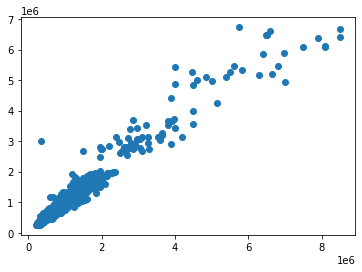

In [94]:
plt.scatter(y_test,y_predict)

In [95]:

from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)
print('Accuracy:', score)

Accuracy: 0.9416916560135992


### Accuracy of the model is 94.17%

## Model Deployment

In [97]:
import pickle
file = open('random_forest_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)